# Introduction
This project is an addendum to my visualization parent project, [Visualizing Earnings Based On College Majors](https://github.com/jnguyen/dataquest-projects/blob/master/Visualizing_Earnings_Based_On_College_Majors/college_grads.ipynb). Here, I generate line plots of college major categories to take a closer look at the gender gap in college degrees.

For all the plots, I use the [Tableau Color Blind 10 Pallette](https://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html) to accomodate color blindness.

## Getting Started -- STEM Degrees
We start by looking at the proportion of degrees awarded by gender for popular STEM majors over the 1970s to 2010s to get a feel for how the gap may manifest.

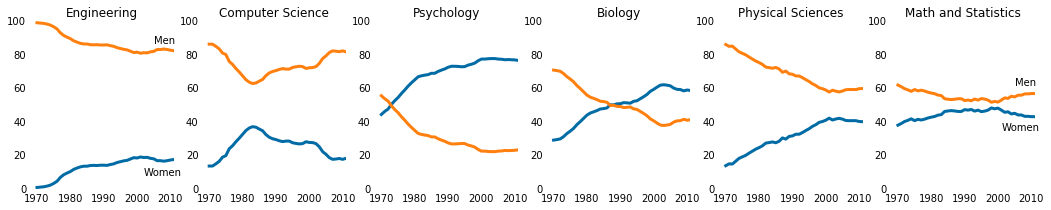

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

Engineering and computer science have had persistent gaps throughout all the years. Physical sciences and math and statistics have achieved more gender parity over time. Interestingly, psychology and biology became women dominated over the time period.

## Visualizing all college major categories together
Let's take a look at these same types of plots, except for three broad classications of major categories: STEM degrees, liberal arts degrees, and other degrees.

In [2]:
# Initialize categories ordered by decreasing % of degrees awarded to women
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

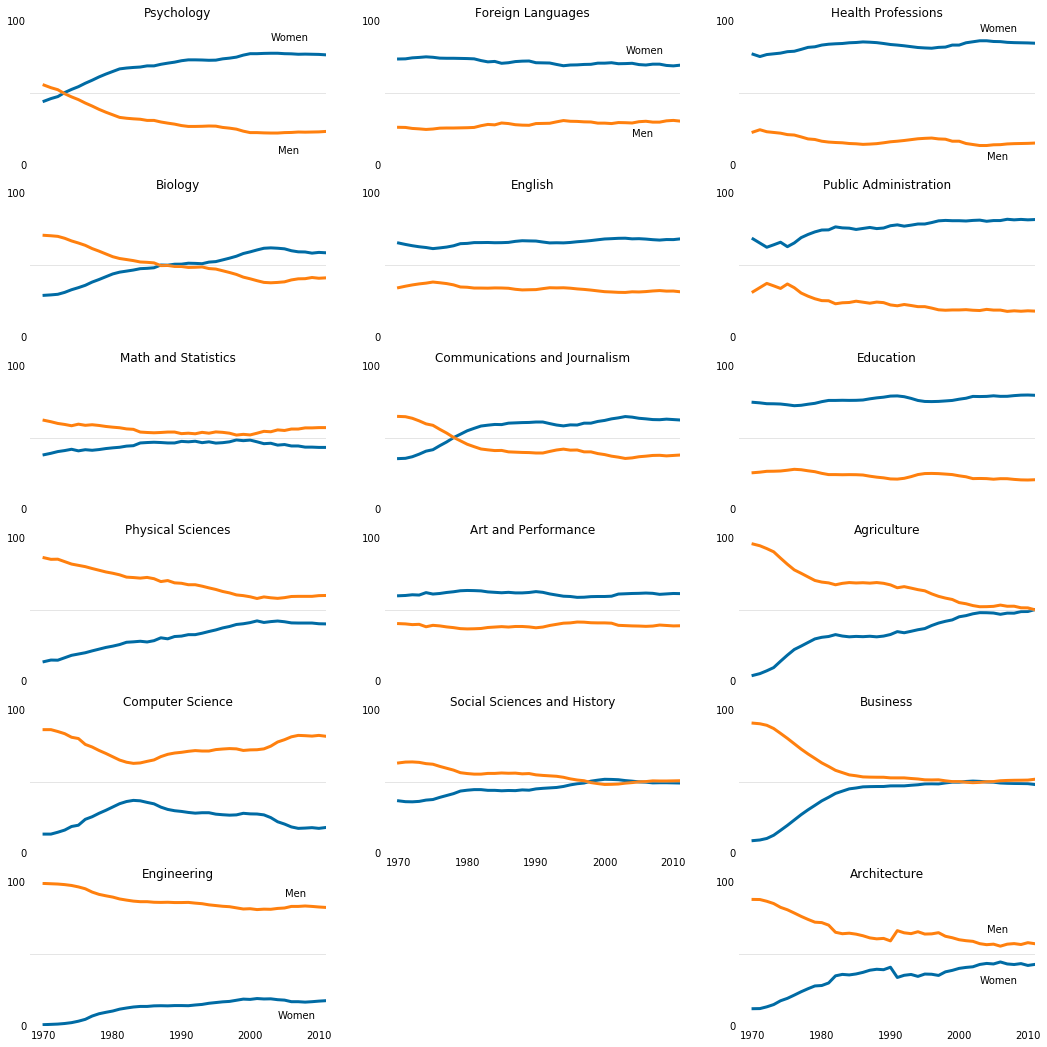

In [35]:
# Plot each class of degree category in its own column
fig = plt.figure(figsize=(18,18))

idx = 0 # Index hack to plot by column
for cat in [stem_cats, lib_arts_cats, other_cats]:
    for sp in range(len(cat)):
        ax = fig.add_subplot(6,3,idx+sp*3+1) # Plot every third (i.e. by column)
        ax.plot(women_degrees['Year'], women_degrees[cat[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[cat[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(cat[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
        ax.set_yticks([0,100])
        # Plot 50% line using Tableau Color Line 10 grey
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        # Add back label ticks for bottommost plots
        if sp==len(cat)-1:
            ax.tick_params(labelbottom='on')
        # Manually add Women/men labels for each column using case/switch logic
        # STEM
        if idx==0:
            # Top plot: Psycchology
            if sp==0:
                ax.text(2003, 87, 'Women')
                ax.text(2004, 8, 'Men')
            # Bottom plot: Engineering
            elif sp==5:
                ax.text(2005, 90, 'Men')
                ax.text(2004, 5, 'Women')
        # Liberal Arts
        elif idx==1:
            # Top plot: Foreign Languages
            if sp==0:
                ax.text(2003, 78, 'Women')
                ax.text(2004, 20, 'Men')
        # Other categories
        elif idx==2:
            # Top plot: Health Professions
            if sp==0:
                ax.text(2003, 93, "Women")
                ax.text(2004, 4, "Men")
            # Bottom plot: Architecture
            elif sp==5:
                ax.text(2004, 65, "Men")
                ax.text(2003, 30, "Women")
                
    # Increment index to plot next column on following loop
    idx += 1

In [39]:
# Save figure
# fig.savefig("gender_degrees.png")

## Observations
* A quick look shows that men outnumber women in
    * 4/6 (66%) of STEM major categories
    * 1/5 (20%) of liberal arts majors
    * 3/3 (50%) in all other categories
* One interpretation is that men gravitate towards STEM majors and women gravitate towards liberal arts majors
* A more cautious reading would take the data is and wonder: why are there more men in STEM majors and more women in liberal arts majors?
* Possible reasons may include social barriers to the sciences that prevent women from enrolling or biases that may occur within majors
* It is difficult to say the reasons for the plots we see without more information
* Sussing out the causal reasons can be done by looking at surveys of why students chose their majors, and general cultural trends as well